In [330]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

In [331]:
df = pd.read_csv('adult.csv')
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [333]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [334]:
len(df[df['capital.gain']==0])

29849

In [335]:
# max age is 90 min age is 17

In [336]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [337]:
# No null values. every column all the 32561 rows have non null values

In [338]:
df['income'].value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

In [339]:
df['sex'].value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

In [306]:
df['native.country'].value_counts()

United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                      

In [307]:
df['workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [308]:
df['occupation'].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [309]:
df['education'].unique()


array(['HS-grad', 'Some-college', '7th-8th', '10th', 'Doctorate',
       'Prof-school', 'Bachelors', 'Masters', '11th', 'Assoc-acdm',
       'Assoc-voc', '1st-4th', '5th-6th', '12th', '9th', 'Preschool'],
      dtype=object)

In [342]:
# for ed in df['education'].unique():
#     print(ed+':'+str(df['education.num'][df['education']==ed]))

In [343]:
#Drop unrequired columns
#Drop education, fnlwgt
df = df.drop(['education','fnlwgt'], axis=1)
df.head()

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [312]:
df.replace('?',np.NaN,inplace = True)
df.head()

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [313]:
df.fillna(method='ffill',inplace=True)
df.head()

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,10,Widowed,Exec-managerial,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


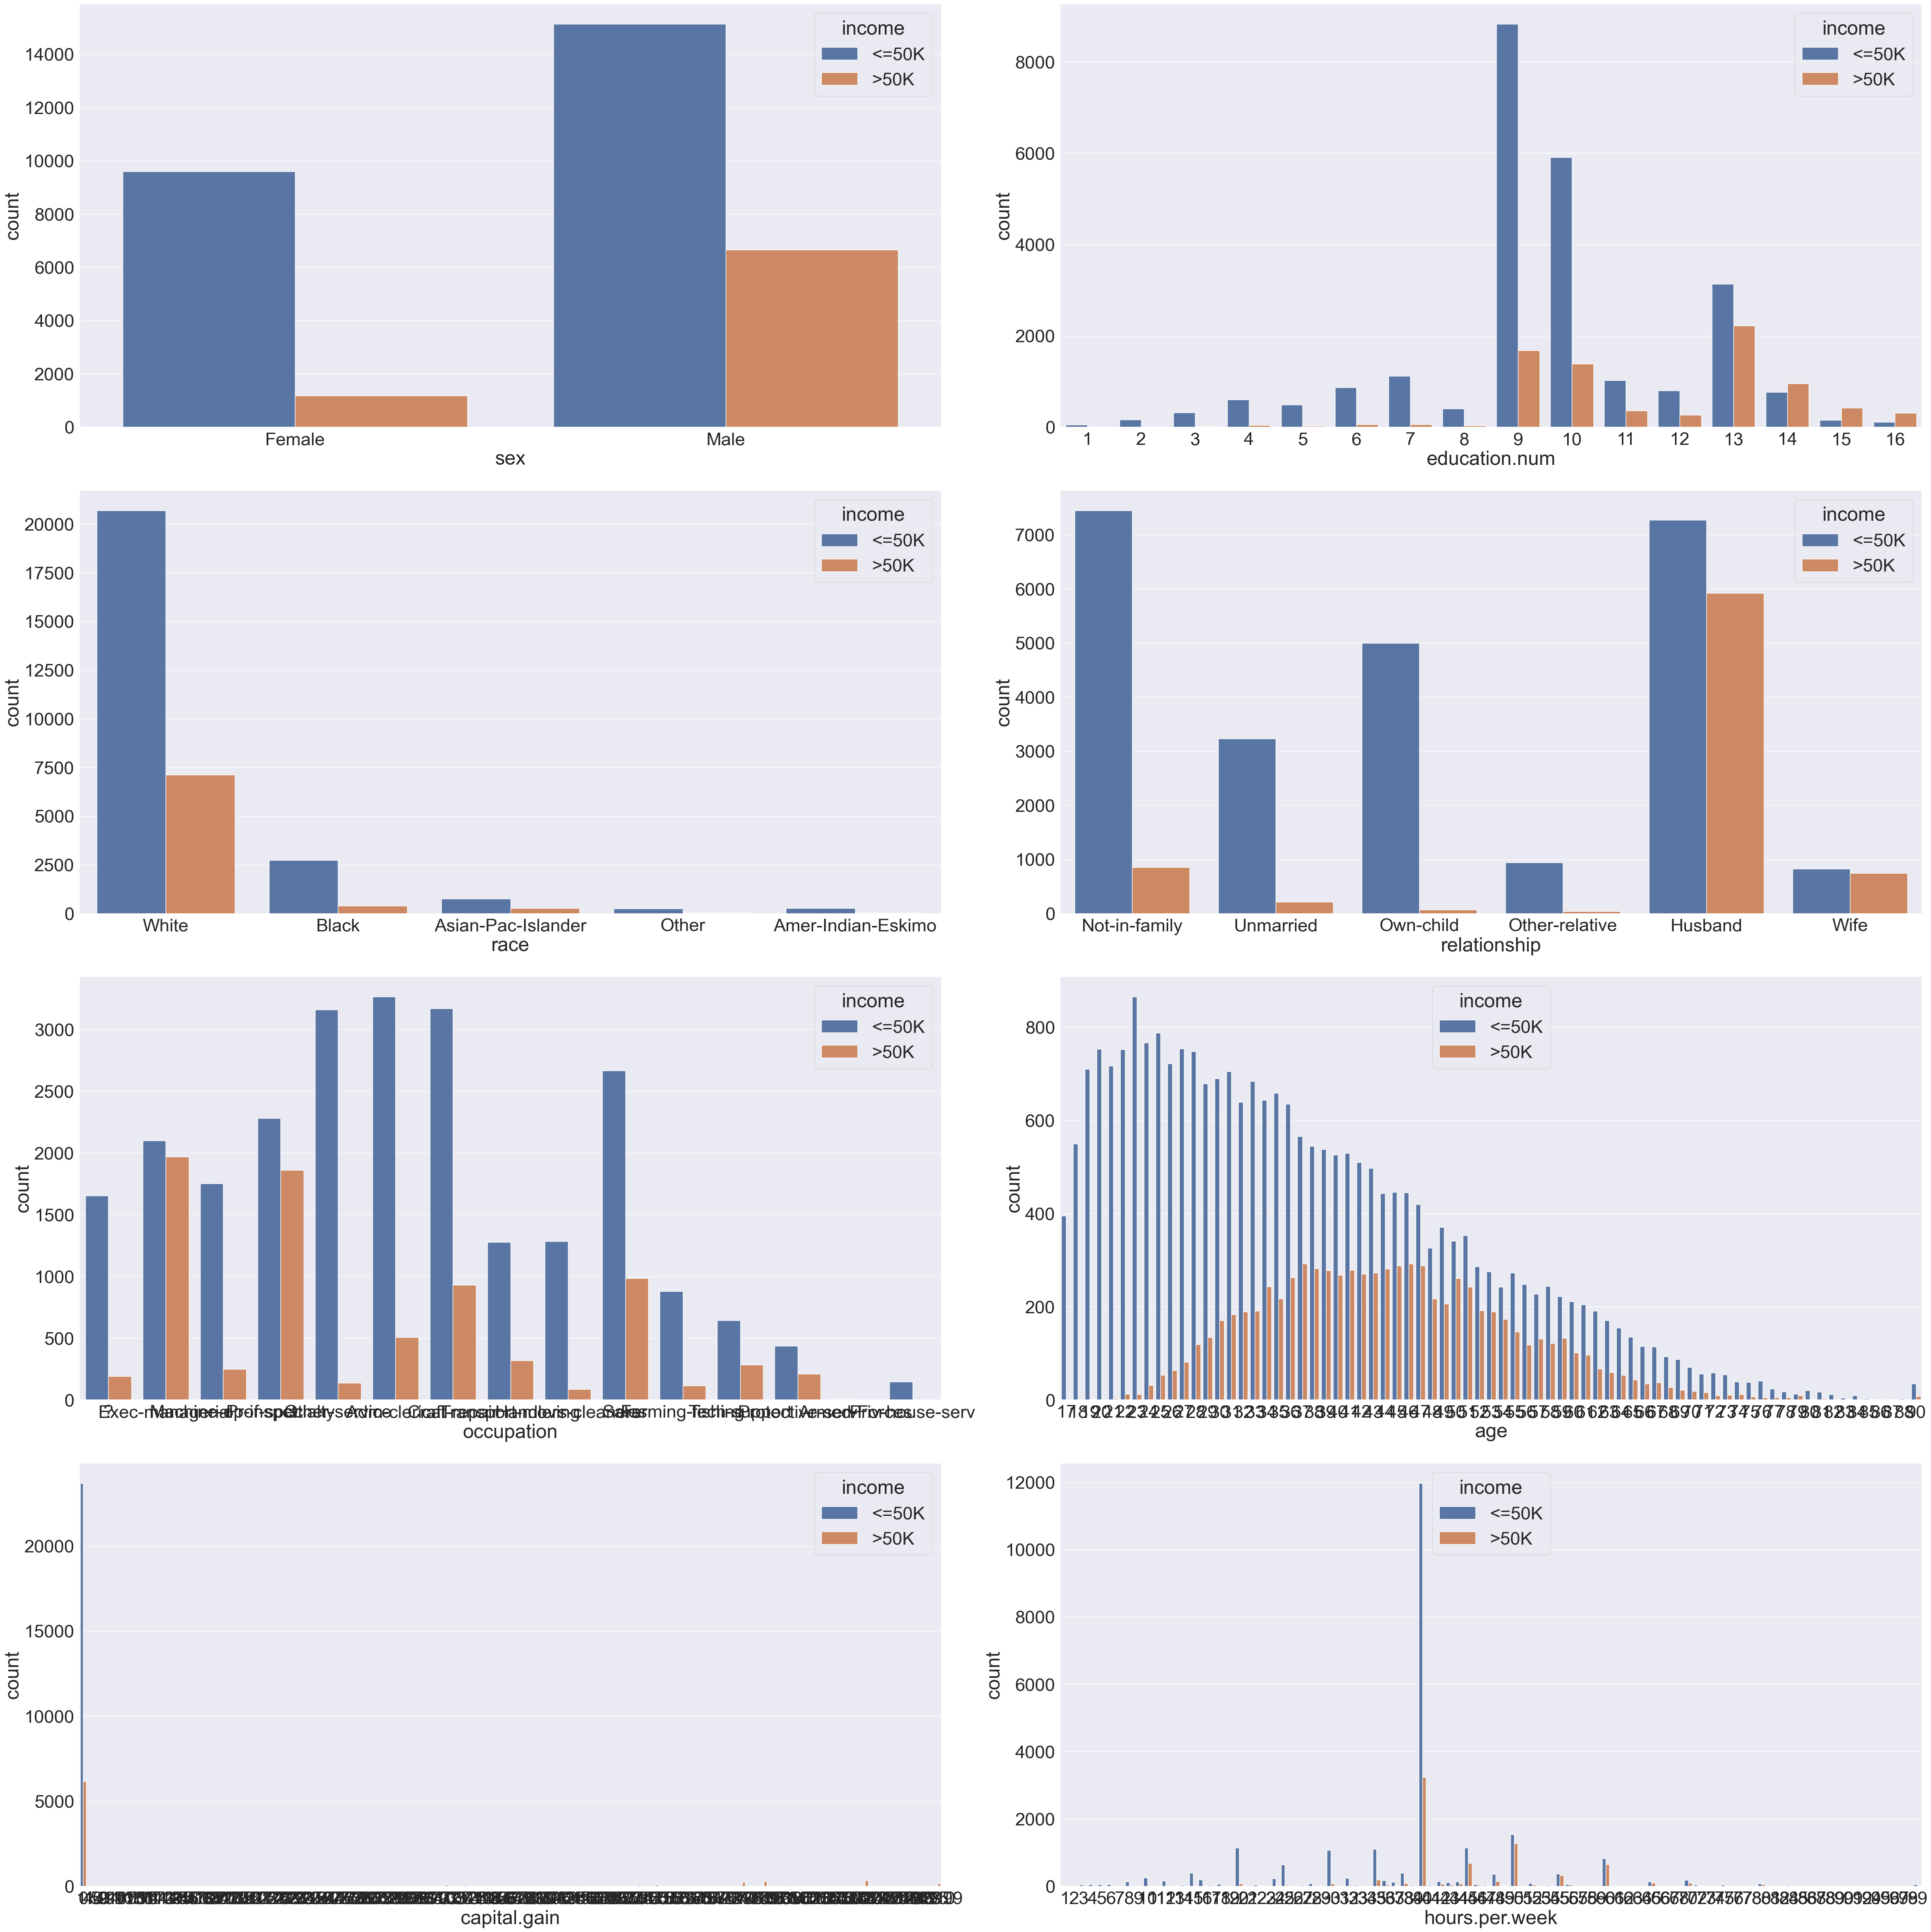

In [352]:
import seaborn as sns
# sns.set(style="darkgrid")

fig, ax = plt.subplots(nrows=4,ncols=2, figsize=(50,50))

sns.set(font_scale=3)

cp=sns.countplot(x="sex", data=df,hue="income",ax = ax[0][0])

cp2 = sns.countplot(x="education.num", data=df,hue="income",ax = ax[0][1])

cp3 = sns.countplot(x="race", data=df,hue="income",ax = ax[1][0])

cp4 = sns.countplot(x="relationship", data=df,hue="income", ax = ax[1][1])

cp5 = sns.countplot(x="occupation", data=df,hue="income",ax= ax[2][0])

cp6 = sns.countplot(x="age", data=df,hue="income", ax=ax[2][1])

cp7 = sns.countplot(x="capital.gain", data=df,hue="income", ax=ax[3][0])

cp8 = sns.countplot(x="hours.per.week", data=df,hue="income", ax=ax[3][1])

plt.tight_layout()

In [ ]:
# Label encoding
encoder = LabelEncoder()
df['workclass'] = encoder.fit_transform(df['workclass'])
df['marital.status'] = encoder.fit_transform(df['marital.status'])
df['occupation'] = encoder.fit_transform(df['occupation'])
df['relationship'] = encoder.fit_transform(df['relationship'])

In [314]:
df['race'] = encoder.fit_transform(df['race'])
df['sex'] = encoder.fit_transform(df['sex'])
df['native.country'] = encoder.fit_transform(df['native.country'])
df['income'] = encoder.fit_transform(df['income'])
df.head()

df

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,8,9,6,14,1,4,0,0,4356,40,38,0
1,82,3,9,6,3,1,4,0,0,4356,18,38,0
2,66,3,10,6,3,4,2,0,0,4356,40,38,0
3,54,3,4,0,6,4,4,0,0,3900,40,38,0
4,41,3,10,5,9,3,4,0,0,3900,40,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,3,10,4,10,1,4,1,0,0,40,38,0
32557,27,3,12,2,12,5,4,0,0,0,38,38,0
32558,40,3,9,2,6,0,4,1,0,0,40,38,1
32559,58,3,9,6,0,4,4,0,0,0,40,38,0


In [315]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
df['capital.gain'] = mms.fit_transform(np.array(df['capital.gain']).reshape(-1,1))
df['capital.loss'] = mms.fit_transform(np.array(df['capital.loss']).reshape(-1,1))

# 0 -> <=50
# 1 -> >50

In [316]:
df['capital.gain'].unique()

array([0.        , 1.        , 0.41310413, 0.34095341, 0.27828278,
       0.25236252, 0.25124251, 0.2204022 , 0.20051201, 0.18481185,
       0.15831158, 0.1502415 , 0.1502015 , 0.14344143, 0.14084141,
       0.13550136, 0.11678117, 0.10605106, 0.10566106, 0.10520105,
       0.09562096, 0.09386094, 0.08614086, 0.0797808 , 0.07896079,
       0.07688077, 0.07443074, 0.07430074, 0.07298073, 0.06849068,
       0.06767068, 0.06723067, 0.06514065, 0.06497065, 0.06418064,
       0.06360064, 0.06097061, 0.05721057, 0.05556056, 0.05455055,
       0.05178052, 0.05060051, 0.0501305 , 0.04934049, 0.04931049,
       0.04865049, 0.04787048, 0.04687047, 0.04650047, 0.04508045,
       0.04416044, 0.04386044, 0.04101041, 0.04064041, 0.03942039,
       0.03908039, 0.03887039, 0.03818038, 0.03781038, 0.03674037,
       0.03471035, 0.03464035, 0.03456035, 0.03432034, 0.03418034,
       0.03411034, 0.03325033, 0.03273033, 0.03137031, 0.03103031,
       0.0299303 , 0.0297703 , 0.0296403 , 0.0296103 , 0.02936

In [317]:
y = df['income']
x = df.drop(['income'], axis=1)

In [318]:
x.head()

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,90,8,9,6,14,1,4,0,0.0,1.000000,40,38
1,82,3,9,6,3,1,4,0,0.0,1.000000,18,38
2,66,3,10,6,3,4,2,0,0.0,1.000000,40,38
3,54,3,4,0,6,4,4,0,0.0,0.895317,40,38
4,41,3,10,5,9,3,4,0,0.0,0.895317,40,38


In [319]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: income, dtype: int32

In [320]:
x.head()

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,90,8,9,6,14,1,4,0,0.0,1.000000,40,38
1,82,3,9,6,3,1,4,0,0.0,1.000000,18,38
2,66,3,10,6,3,4,2,0,0.0,1.000000,40,38
3,54,3,4,0,6,4,4,0,0.0,0.895317,40,38
4,41,3,10,5,9,3,4,0,0.0,0.895317,40,38


In [321]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

In [322]:
from sklearn.naive_bayes import GaussianNB
gb = GaussianNB()
gb.fit(x_train,y_train)

GaussianNB()

In [323]:
y_gb_pred = gb.predict(x_test)

In [324]:
set(y_gb_pred)

{0, 1}

In [325]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_gb_pred))
print(mean_squared_error(gb.predict(x_train),y_train))
print(classification_report(y_test,y_gb_pred))

0.8079226163058498
0.19763513513513514
              precision    recall  f1-score   support

           0       0.83      0.95      0.88      5007
           1       0.67      0.33      0.44      1506

    accuracy                           0.81      6513
   macro avg       0.75      0.64      0.66      6513
weighted avg       0.79      0.81      0.78      6513



In [326]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

y_lr_pred = lr.predict(x_test)
print(accuracy_score(y_test,y_lr_pred))

print(mean_squared_error(lr.predict(x_train),y_train))
# print(confusion_matrix(y_test,y_lr_pred))
print(classification_report(y_test,y_lr_pred))

0.8109933978197451
0.19487100737100738
              precision    recall  f1-score   support

           0       0.84      0.93      0.88      5007
           1       0.64      0.42      0.50      1506

    accuracy                           0.81      6513
   macro avg       0.74      0.67      0.69      6513
weighted avg       0.79      0.81      0.80      6513



C:\Users\tarun\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [327]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)

y_dtc_pred = dtc.predict(x_test)
print(accuracy_score(y_test,y_dtc_pred))
print(mean_squared_error(dtc.predict(x_train),y_train))
print(classification_report(y_test,y_dtc_pred))

0.8134500230308613
0.020692567567567568
              precision    recall  f1-score   support

           0       0.88      0.87      0.88      5007
           1       0.59      0.61      0.60      1506

    accuracy                           0.81      6513
   macro avg       0.74      0.74      0.74      6513
weighted avg       0.82      0.81      0.81      6513



In [328]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
gbc.fit(x_train,y_train)

y_gbc_pred = gbc.predict(x_test)
print(accuracy_score(y_test,y_gbc_pred))
print(mean_squared_error(gbc.predict(x_train),y_train))
print(classification_report(y_test,y_gbc_pred))

0.8688776293566712
0.13198710073710074
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      5007
           1       0.77      0.61      0.68      1506

    accuracy                           0.87      6513
   macro avg       0.83      0.78      0.80      6513
weighted avg       0.86      0.87      0.86      6513



In [356]:
# Choose gradient boosting classifier

def parameter_tuning(max_depth=3,l=0.01,n=100):
    gbc1 = GradientBoostingClassifier(max_depth = max_depth,learning_rate=l,n_estimators=n)
    gbc1.fit(x_train,y_train)

    y_gbc1_pred = gbc1.predict(x_test)
    print(accuracy_score(y_test,y_gbc1_pred))
    print(classification_report(y_test,y_lr_pred))

depth = [3,4,5,6,7,8,10]
learning_rates = [0.1,0.01]
n_estimators = [100,500,800]

for d in depth:
    for l in learning_rates:
        for n in n_estimators:
            print('depth is:'+str(d)+' lr:'+str(l)+' n:'+ str(n))
            parameter_tuning(d,l,n)

depth is:3 lr:0.1 n:100
0.8688776293566712
              precision    recall  f1-score   support

           0       0.84      0.93      0.88      5007
           1       0.64      0.42      0.50      1506

    accuracy                           0.81      6513
   macro avg       0.74      0.67      0.69      6513
weighted avg       0.79      0.81      0.80      6513

depth is:3 lr:0.1 n:500
0.8751727314601566
              precision    recall  f1-score   support

           0       0.84      0.93      0.88      5007
           1       0.64      0.42      0.50      1506

    accuracy                           0.81      6513
   macro avg       0.74      0.67      0.69      6513
weighted avg       0.79      0.81      0.80      6513

depth is:3 lr:0.1 n:800
0.8740979579302932
              precision    recall  f1-score   support

           0       0.84      0.93      0.88      5007
           1       0.64      0.42      0.50      1506

    accuracy                           0.81      6513